In [34]:
#Acceptance rate by major, Region, Institution
import csv
import pandas as pd
import numpy as np
import folium
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
pd_data = pd.read_csv("FY16_College_Data.csv")
df = pd.DataFrame(pd_data)
len(df)
#df.head()

2109

In [36]:
accept_df = df[['UNITID','INSTNM','CITY','STABBR', 'REGION', 'LATITUDE',
'LONGITUDE', 'ADM_RATE','SAT_AVG', 'ACTCMMID']]
print(len(accept_df))
accept_df.head()

2109


,UNITID,INSTNM,CITY,STABBR,REGION,LATITUDE,LONGITUDE,ADM_RATE,SAT_AVG,ACTCMMID
0,100654,Alabama A & M University,Normal,AL,5,34.783368,-86.568502,0.6538,850.0,18.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,5,33.502230,-86.809170,0.6043,1147.0,25.0
2,100690,Amridge University,Montgomery,AL,5,32.362609,-86.174010,NaN,NaN,NaN
3,100706,University of Alabama in Huntsville,Huntsville,AL,5,34.722818,-86.638420,0.8120,1221.0,27.0
4,100724,Alabama State University,Montgomery,AL,5,32.364317,-86.295677,0.4639,844.0,18.0


## Colleges acceptance rate less than 10 % by SAT or ACT score

In [37]:
rate_accept_top10prc = accept_df[(accept_df['ADM_RATE'] > 0) & (accept_df['ADM_RATE'] < 0.1)]
rate_accept_top10prc = rate_accept_top10prc.dropna(subset=['SAT_AVG'])
print(len(rate_accept_top10prc))
rate_accept_top10prc

9


,UNITID,INSTNM,CITY,STABBR,REGION,LATITUDE,LONGITUDE,ADM_RATE,SAT_AVG,ACTCMMID
74,110404,California Institute of Technology,Pasadena,CA,8,34.139275,-118.125740,0.0881,1544.0,35.0
221,130794,Yale University,New Haven,CT,1,41.311158,-72.926688,0.0673,1498.0,33.0
348,144050,University of Chicago,Chicago,IL,3,41.789170,-87.601196,0.0838,1506.0,34.0
645,166027,Harvard University,Cambridge,MA,1,42.374429,-71.118177,0.0558,1497.0,34.0
656,166683,Massachusetts Institute of Technology,Cambridge,MA,1,42.360095,-71.092115,0.0830,1507.0,34.0
904,186131,Princeton University,Princeton,NJ,2,40.348530,-74.663603,0.0714,1490.0,34.0
943,190150,Columbia University in the City of New York,New York,NY,2,40.808286,-73.961885,0.0661,1473.0,33.0
1391,217156,Brown University,Providence,RI,1,41.827605,-71.404467,0.0949,1457.0,33.0
1746,243744,Stanford University,Stanford,CA,8,37.426967,-122.168826,0.0504,1479.0,33.0


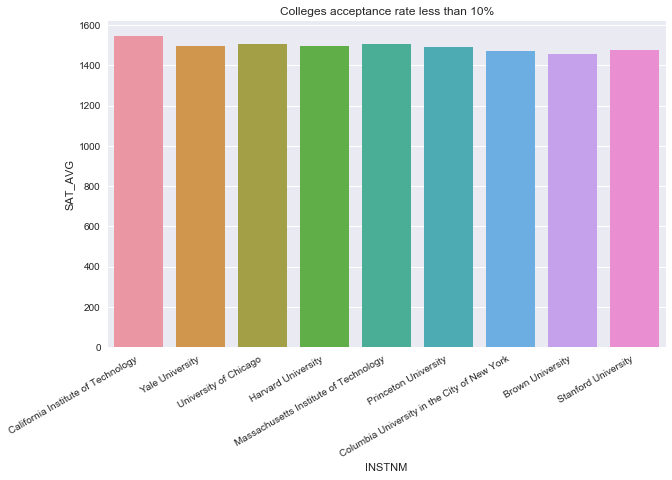

In [39]:
sn_plot_acceptance_sat_avg = sns.barplot(x="INSTNM", y="SAT_AVG", data=rate_accept_top10prc)
sn_plot_acceptance_sat_avg.set_xticklabels(sn_plot_acceptance_sat_avg.get_xticklabels(),rotation=30,ha='right')
sns.set(rc={'figure.figsize':(10,6)})
plt.title("Colleges acceptance rate less than 10%")
plt.savefig("TopTenByAccRateAndSAT.png")
plt.show()                 

## Colleges acceptance rate less than 25% by SAT or ACT score

In [40]:
rate_accept_25prc = accept_df[(accept_df['ADM_RATE'] > 0) & (accept_df['ADM_RATE'] < 0.25)]
len(rate_accept_25prc)

68

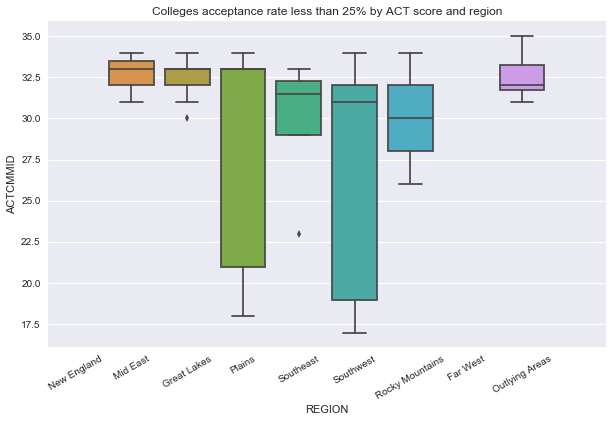

In [41]:
xticks = ['New England', 'Mid East','Great Lakes','Plains', 'Southeast','Southwest','Rocky Mountains','Far West','Outlying Areas']
sn_acceptance_rate_sat_25prc = sns.boxplot(x="REGION", y="ACTCMMID", data=rate_accept_25prc)
sn_acceptance_rate_sat_25prc.set_xticklabels(xticks,rotation=30)
sns.set(rc={'figure.figsize':(10, 8)})
plt.title("Colleges acceptance rate less than 25% by ACT score and region")
plt.savefig("AcceptanceRateLess25%ByRegion.png")
plt.show() 

## Colleges acceptance rate less than 50% by SAT or ACT score

In [42]:
sn_rate_accept_50prc = accept_df[(accept_df['ADM_RATE'] > 0) & (accept_df['ADM_RATE'] < 0.5)]
len(sn_rate_accept_50prc)

325

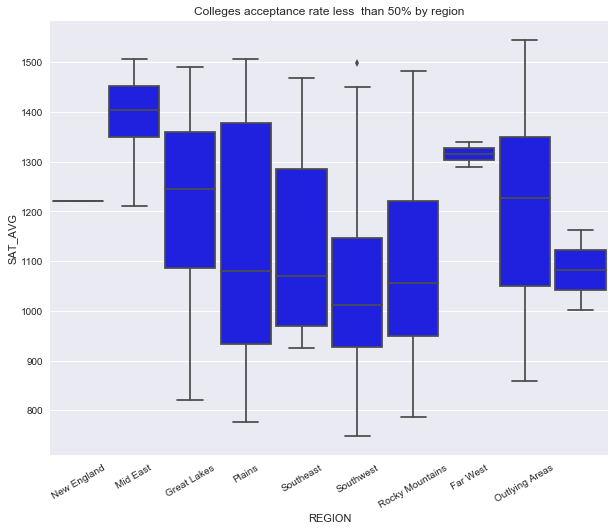

In [43]:
sn_plot_acceptance_sat_avg = sns.boxplot(x="REGION", y="SAT_AVG", width=0.9, data=sn_rate_accept_50prc, color="blue")
sns.set(rc={'figure.figsize':(10,8)})
sn_plot_acceptance_sat_avg.set_xticklabels(xticks,rotation=30)
plt.title("Colleges acceptance rate less  than 50% by region")
plt.show()                 

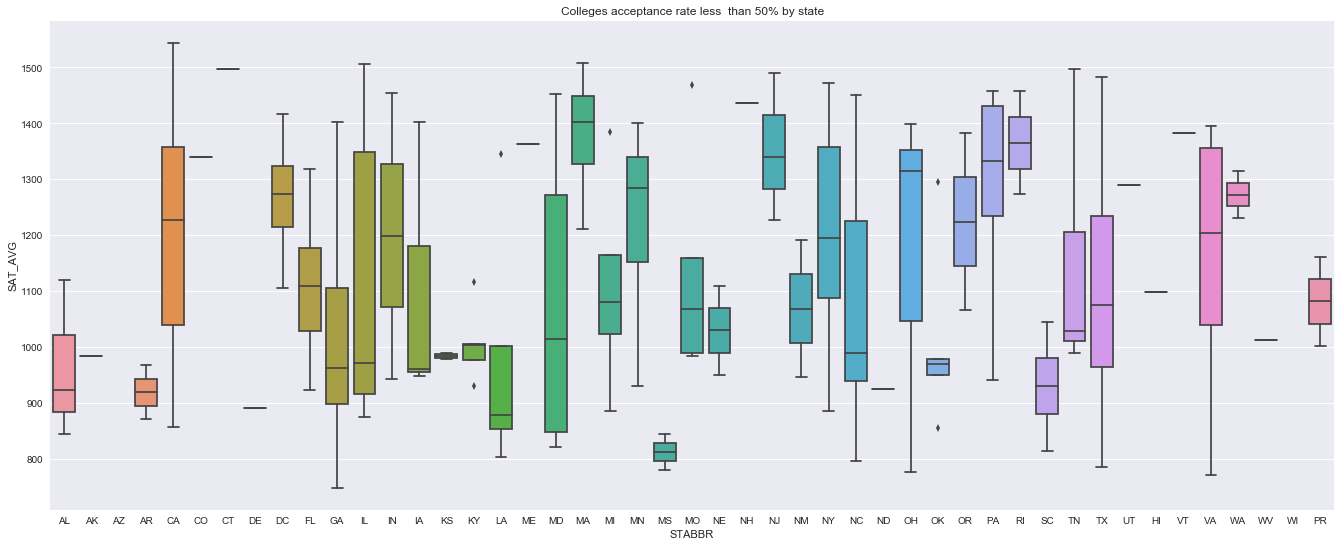

In [45]:
sn_acceptance_rate_sat = sns.boxplot(x="STABBR", y="SAT_AVG", data=sn_rate_accept_50prc)
sns.set(rc={'figure.figsize':(23,9)})
plt.title("Colleges acceptance rate less  than 50% by state")
plt.savefig("AcceptanceRateLess50%ByStates.png")
plt.show() 

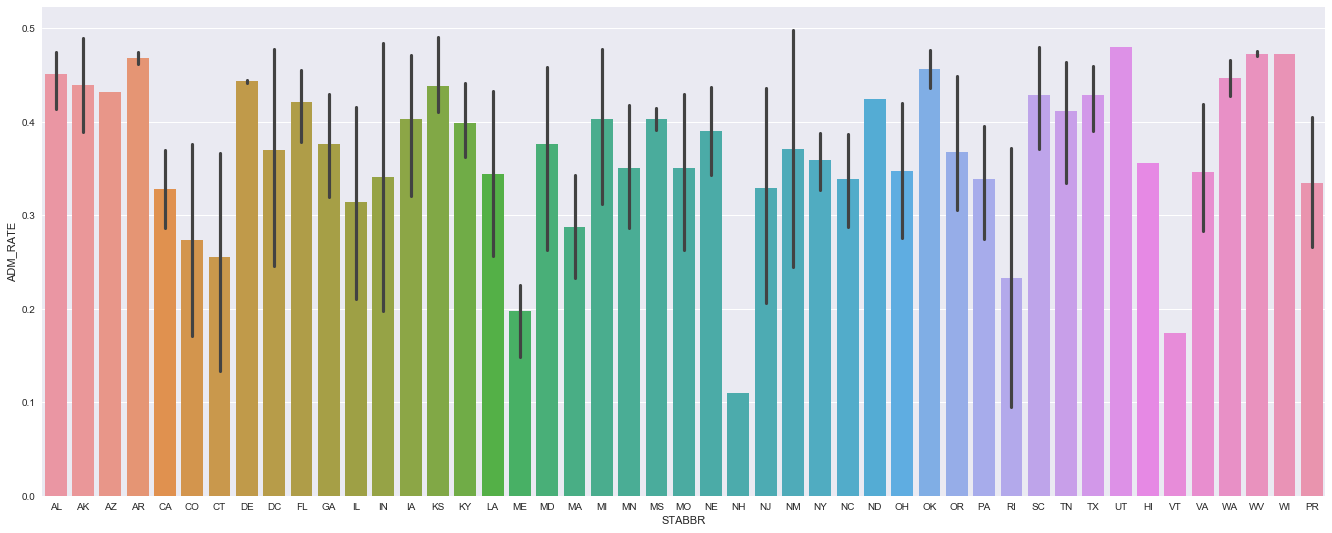

In [46]:
sn_acceptance_avg_sat_st = sns.barplot(x="STABBR", y="ADM_RATE", data=sn_rate_accept_50prc)
sns.set(rc={'figure.figsize':(30,9)})
plt.savefig("AcceptanceRateByStates.png")
plt.show()              

## Average SAT vs Average Cost

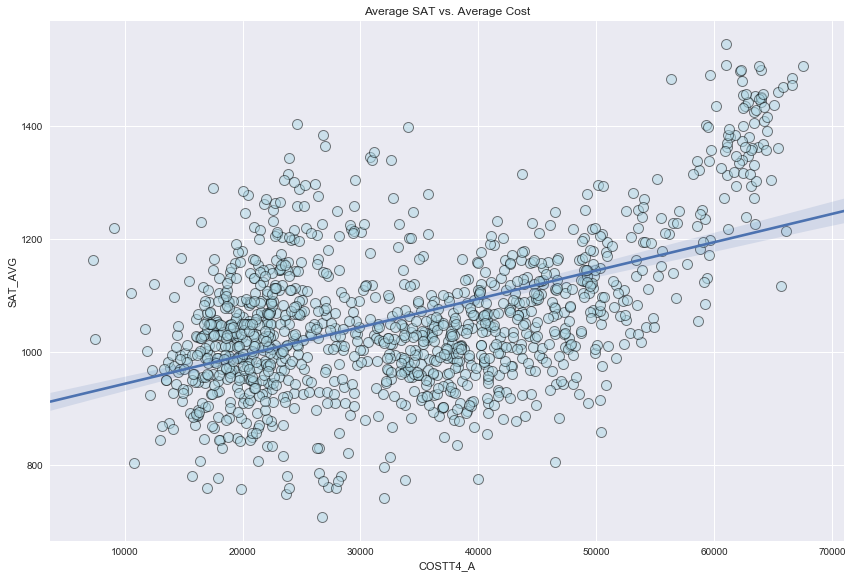

In [47]:
avgSAT_avgCost = sns.lmplot(x="COSTT4_A", y="SAT_AVG", data= df, size=8, legend=True, 
                      legend_out=True, aspect=1.5, scatter_kws = {"color":"lightblue",'alpha':0.5, "s":100,'linewidths':1,'edgecolor':'black', 'marker':'o'}, 
                      palette={"SAT_AVG":"red"})

plt.title("Average SAT vs. Average Cost")
plt.savefig("Average SAT vs. Average cost.png")
plt.show()